### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib
import sklearn
import librosa
import os
from IPython.display import display

### Audio Preprocessing

In [2]:
from feature_extraction import extract_features, get_column_names

# 1. Carregar metadados
tracks_df = pd.read_csv('../fma_metadata/tracks.csv', index_col=0, header=[0, 1])
small_subset_ids = tracks_df[tracks_df[('set', 'subset')] <= 'small'].index

# 2. Preparar listas para armazenar dados
all_data = []
all_labels = []
all_splits = []
track_ids = []

audio_dir = '../fma_datasets/fma_small_genres'
print("Starting feature extraction...")

# --- Loop principal ---
# (Este loop levará algum tempo para 8000 músicas)
for genre_folder in os.listdir(audio_dir):
    genre_path = os.path.join(audio_dir, genre_folder)
    if not os.path.isdir(genre_path):
        continue
        
    for audio_file in os.listdir(genre_path):
        if audio_file.endswith('.mp3'):
            track_id = int(os.path.basename(audio_file).split('.')[0])
            
            # Garante que o track_id está no subset 'small'
            if track_id in small_subset_ids:
                file_path = os.path.join(genre_path, audio_file)
                
                # Extrai features
                features = extract_features(file_path)
                
                if features is not None:
                    all_data.append(features)
                    # Pega o label (gênero) e o split (treino/teste) dos metadados
                    all_labels.append(tracks_df.loc[track_id, ('track', 'genre_top')])
                    all_splits.append(tracks_df.loc[track_id, ('set', 'split')])
                    track_ids.append(track_id)
    print(".")

print("Extraction is ready! :]")

# 3. Criar DataFrame final com features e labels
# (Isso facilita o escalonamento e a divisão)
column_names = get_column_names()

feature_dataframe = pd.DataFrame(all_data, index=track_ids, columns=column_names)
feature_dataframe['genre'] = all_labels
feature_dataframe['split'] = all_splits

# Salve suas features! Você não quer rodar isso de novo.
feature_dataframe.to_csv('../preprocessed_features/fma_small_features.csv')

print("Features saved into fma_small_features.csv!")

Starting feature extraction...


/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/notebooks/feature_extraction.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  wave_form_y, sampling_rate = librosa.load(file_path, mono=True, sr=None)
[src/libmpg123/parse.c:do_readahead():1123] warning: Cannot read next header, a one-frame stream? Duh...
/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/.env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Erro ao processar ../fma_datasets/fma_small_genres/Rock/108925.mp3: 
.


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 33361.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1389] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).
/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/notebooks/feature_extraction.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  wave_form_y, sampling_rate = librosa.load(file_path, mono=True, sr=None)
/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/.env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/.env/lib/python3.12/site-packages/librosa/

.


/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/.env/lib/python3.12/site-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


.


[src/libmpg123/layer3.c:INT123_do_layer3():1908] error: dequantization failed!
[src/libmpg123/layer3.c:INT123_do_layer3():1908] error: dequantization failed!


.


[src/libmpg123/layer3.c:INT123_do_layer3():1878] error: part2_3_length (3328) too large for available bit count (3240)
[src/libmpg123/layer3.c:INT123_do_layer3():1878] error: part2_3_length (3360) too large for available bit count (3240)


.


[src/libmpg123/parse.c:do_readahead():1123] warning: Cannot read next header, a one-frame stream? Duh...
/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/notebooks/feature_extraction.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  wave_form_y, sampling_rate = librosa.load(file_path, mono=True, sr=None)
/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/.env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Erro ao processar ../fma_datasets/fma_small_genres/Electronic/099134.mp3: 
.
.


/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/notebooks/feature_extraction.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  wave_form_y, sampling_rate = librosa.load(file_path, mono=True, sr=None)
[src/libmpg123/parse.c:do_readahead():1123] warning: Cannot read next header, a one-frame stream? Duh...
/home/zurua/GitHub_Repos/TCC_Machine-Learning-Applied-To-Music-Genre-Classification/.env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Erro ao processar ../fma_datasets/fma_small_genres/Experimental/133297.mp3: 
.
Extraction is ready! :]
Features saved into fma_small_features.csv!


In [ ]:
# For some reason, as you may see at the log above, 3 audio files seems to be corrupted (133297.mp3, 099134.mp3, 108925.mp3) and had extraction failure.
# There are also lots of warnings regarding librosa trying to read .mp4 files, but that affects nothing: https://gemini.google.com/share/2dbae299b5ae

# Now, let's see the collected attributes from audio file!
display(feature_dataframe)

,mfcc_mean_01,mfcc_mean_02,mfcc_mean_03,mfcc_mean_04,mfcc_mean_05,mfcc_mean_06,mfcc_mean_07,mfcc_mean_08,mfcc_mean_09,mfcc_mean_10,...,chroma_std_07,chroma_std_08,chroma_std_09,chroma_std_10,chroma_std_11,chroma_std_12,zcr_mean_01,zcr_std_01,genre,split
145607,-5.745502,134.346924,-54.908939,20.991581,-12.239856,24.547785,-8.749990,20.078072,-4.725392,16.157930,...,0.079895,0.070182,0.073518,0.087751,0.056909,0.083382,0.077145,0.024081,Rock,training
145258,-68.271225,128.934814,-4.329473,32.609592,-8.607078,22.538334,-2.108504,9.246871,-5.778066,10.098799,...,0.118314,0.139260,0.102993,0.159882,0.106903,0.088983,0.074272,0.044218,Rock,training
1883,-98.986244,145.005096,-83.870476,57.938408,3.724430,29.091852,-16.561304,20.213928,-8.996487,12.168061,...,0.078683,0.153033,0.060235,0.107641,0.058172,0.092619,0.104915,0.015941,Rock,training
92508,-90.103615,170.515594,-49.218166,43.108955,-28.307594,15.511887,-18.906467,2.932544,-6.811740,-6.592190,...,0.066602,0.067758,0.029520,0.042797,0.061838,0.063128,0.058503,0.017664,Rock,training
119922,-70.388481,163.961868,-39.683319,21.877630,2.679895,12.328614,-11.434393,5.124918,-7.803646,5.620416,...,0.127540,0.110663,0.093609,0.127658,0.080684,0.160770,0.054391,0.012796,Rock,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37784,-209.306625,161.364288,-87.061195,17.719933,-52.551922,-4.820417,3.133582,-6.425201,-20.691467,-5.811396,...,0.058488,0.146463,0.061984,0.148908,0.085986,0.141162,0.078209,0.028016,Experimental,training
40909,-321.986389,154.492325,-3.125163,37.763336,20.916264,22.296890,16.425766,8.246545,-4.121358,-8.799649,...,0.137184,0.076827,0.112601,0.104052,0.086511,0.105147,0.046805,0.050766,Experimental,training
139663,-132.361679,215.439529,-40.406025,24.473234,9.014730,-16.476284,5.290881,10.343417,5.518683,0.184749,...,0.149590,0.182415,0.168788,0.169763,0.090870,0.207446,0.033208,0.016660,Experimental,training
60317,-337.263123,116.366455,37.544388,44.387081,26.271761,31.095682,3.738291,16.897575,5.288640,19.330606,...,0.090527,0.071687,0.085713,0.090448,0.102859,0.097698,0.014769,0.019376,Experimental,training


In [29]:
# You may have perceived the great difference of scale among the different attributes. For some model algorithms, this is really bad for training.
# That is way we shall normalize their scales to a single one, and we're going to do it with StandardScaler (Z-score) from Scikit-Learn. 
# It will result on all means being equal 0, and all standard deviations being 1.
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Codificar os labels (gêneros) de string para números
label_encoder = LabelEncoder()
feature_dataframe['genre_encoded'] = label_encoder.fit_transform(feature_dataframe['genre'])

# 2. Dividir em Treino, Validação e Teste (usando os splits do FMA)
train_dataframe = feature_dataframe[feature_dataframe['split'] == 'training']
val_dataframe = feature_dataframe[feature_dataframe['split'] == 'validation']
test_dataframe = feature_dataframe[feature_dataframe['split'] == 'test']

# 3. Separar X (features) e y (labels)
feature_cols = feature_dataframe.columns.drop(['genre', 'split', 'genre_encoded'])

X_train = train_dataframe[feature_cols]
y_train = train_dataframe['genre_encoded']

X_val = val_dataframe[feature_cols]
y_val = val_dataframe['genre_encoded']

X_test = test_dataframe[feature_cols]
y_test = test_dataframe['genre_encoded']

print(f"Dados de treino: {X_train.shape}, Dados de teste: {X_test.shape}, Dados de validação: {X_val.shape}")

# 4. Normalização por Escalonamento (Scaling)
scaler = StandardScaler()

## AJUSTE (fit) o scaler APENAS nos dados de TREINO, evitando data leakage
## --> AQUI ele aprende a média e o desvio padrão de X_train
scaler.fit(X_train)

## TRANSFORME (transform) todos os conjuntos
## --> AQUI ele aplica a normalização em todos os dados
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

display(X_val_scaled)

Dados de treino: (6397, 80), Dados de teste: (800, 80), Dados de validação: (800, 80)


array([[ 1.10187796,  0.07786773, -1.13010226, ..., -0.22009161,
        -0.11712782, -0.72412205],
       [ 1.43388478,  0.14244324, -0.53477388, ..., -0.47557317,
        -0.30347367, -0.74350031],
       [-0.12675533,  0.27237291, -0.03824225, ...,  0.10104881,
        -0.21664135, -0.35232299],
       ...,
       [ 0.09865266,  1.72431567, -0.8003672 , ..., -0.05799483,
        -0.80694988, -0.72156019],
       [-1.59727357,  1.77774945,  3.79312957, ..., -1.92854019,
        -1.04787165, -1.26904338],
       [-0.28152249, -1.03905594, -0.0128632 , ...,  0.12784813,
         1.46656417,  3.02949503]])

### K-NN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Treinamento do KNN
## Comece com um valor comum para k (n_neighbors)
k_knn = 5
knn = KNeighborsClassifier(n_neighbors=k_knn, n_jobs=-1)

print("Training KNN model...")
knn.fit(X_train_scaled, y_train)
print("Training is complete!\n")

Training KNN model...
Training is complete!



Acurácia do KNN (k=5): 34.12%

Relatório de Classificação:
               precision    recall  f1-score   support

   Electronic       0.39      0.43      0.41       100
 Experimental       0.27      0.17      0.21       100
         Folk       0.17      0.23      0.19       100
      Hip-Hop       0.53      0.67      0.59       100
 Instrumental       0.25      0.12      0.16       100
International       0.32      0.35      0.33       100
          Pop       0.23      0.23      0.23       100
         Rock       0.50      0.53      0.52       100

     accuracy                           0.34       800
    macro avg       0.33      0.34      0.33       800
 weighted avg       0.33      0.34      0.33       800


Matriz de Confusão:


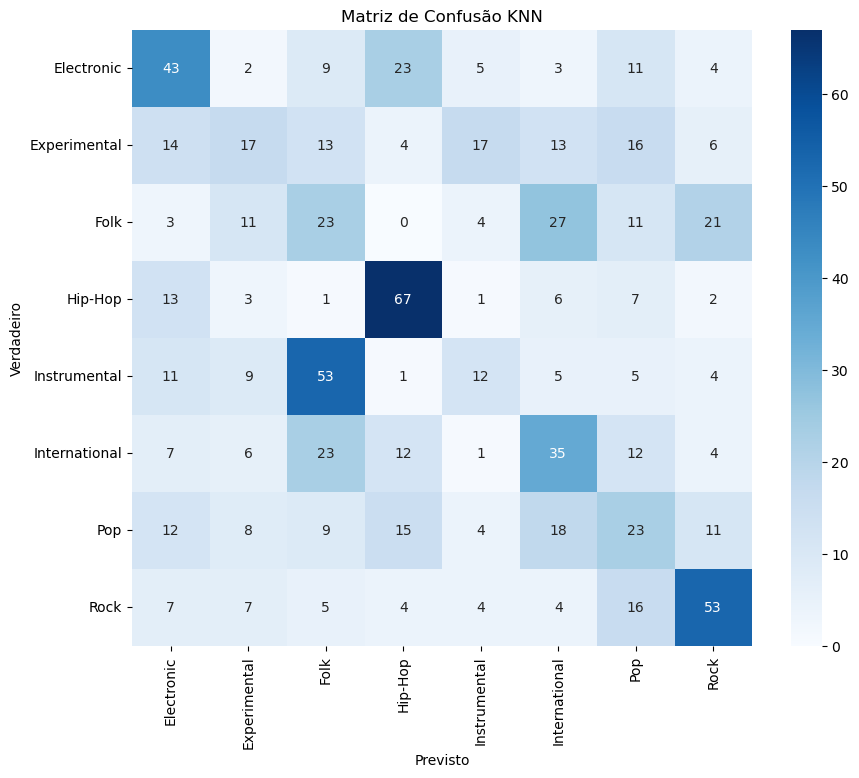

In [49]:
# 2. Avaliando o KNN
# Avalie no conjunto de teste
y_pred = knn.predict(X_test_scaled)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN (k={k_knn}): {accuracy * 100:.2f}%")

# Relatório de Classificação (Precisão, Recall, F1-score por gênero)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matriz de Confusão
print("\nMatriz de Confusão:")
c_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
seaborn.heatmap(c_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão KNN')
plt.show()